In [6]:
#repare corpus

# dictionary to replace
dic = {}
with open('disease_set.txt', 'r') as f:
    line = f.readline()
    while line:
        word = line.strip().lower()
        phrase = word.replace('_', ' ')
        if ' or ' in phrase:
            ps = phrase.split(' or ')
            for p in ps:
                dic[p] = word
        else:
            dic[phrase] = word
        line = f.readline()
dic

{'abnormal spine curvature': 'abnormal_spine_curvature',
 'acne': 'acne',
 'acquired coagulation defect': 'acquired_coagulation_defect',
 'acquired hypothyroidism': 'acquired_hypothyroidism',
 'acquired limb deformities': 'acquired_limb_deformities',
 'acquired other myopathies': 'acquired_other_myopathies',
 'acquired retinal defects': 'acquired_retinal_defects',
 'acquired visual disturbances': 'acquired_visual_disturbances',
 'acute bronchitis': 'acute_bronchitis',
 'acute renal failure': 'acute_renal_failure',
 'acute sinusitis': 'acute_sinusitis',
 'acute upper respiratory infection': 'acute_upper_respiratory_infection',
 'addisons disease': 'addisons_disease',
 'adhd': 'adhd',
 'adjustment disorder': 'adjustment_disorder',
 'allergic rhinitis': 'allergic_rhinitis',
 'alopecia': 'alopecia',
 'alveolar disease': 'alveolar_disease',
 'alzheimers disease': 'alzheimers_disease',
 'aneurysm': 'aneurysm',
 'anxiety phobic disorder': 'anxiety_phobic_disorder',
 'aplastic anemia': 'aplast

In [8]:
%%time

# replace phrases in the corpus
import re
f = open('corpus/sentences_00.txt')
fp = open('corpus/sentences_00_rev.txt', 'w') 

rep = dict((re.escape(k), v) for k, v in dic.items())
pattern = re.compile("|".join(rep.keys()))

line = f.readline().lower()
while True:
    line = f.readline()
    if line == '': break
    new_line = pattern.sub(lambda m: rep[re.escape(m.group(0))], line)
    fp.write(new_line)    
fp.close()

CPU times: user 5h 26min 38s, sys: 57.1 s, total: 5h 27min 35s
Wall time: 5h 28min 44s


In [9]:
%%time
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.word2vec import LineSentence

sentenceCorpus = LineSentence('corpus/sentences_00_rev.txt')
model = Word2Vec(sentences=sentenceCorpus, 
                 window=30,
                 seed=42,
                 workers=5,)

model.wv.save('embeddings_00.model')

/home/chaozhang/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/chaozhang/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 16h 39min 47s, sys: 6min 13s, total: 16h 46min 1s
Wall time: 5h 1min 53s


In [19]:
model = Word2Vec.load('embeddings_00.model')

/home/chaozhang/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/home/chaozhang/.local/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


AttributeError: Can't get attribute 'Word2VecKeyedVectors' on <module 'gensim.models.deprecated.keyedvectors' from '/home/chaozhang/.local/lib/python3.6/site-packages/gensim/models/deprecated/keyedvectors.py'>

In [18]:
model.wv.similarity('pain', 'cancer')

0.35235864

In [22]:
hurts = {}
for v in dic.values():
    try:
        print(v, model.wv.similarity('pain', v))
        hurts[v] = model.wv.similarity('pain', v)
    except:
        continue
print(len(dic), len(hurts))

sexual_dysfunction 0.45464385
infestation 0.20254318
rheumatic_heart_disease 0.1679658
nail_disease 0.17437923
hypotension 0.49049133
neonatal_disease 0.13233495
eating_disorder 0.35107684
seborrheic_dermatitis 0.34381217
lactose_intolerance 0.16536182
hearing_loss 0.40458053
cervical_cancer 0.15631033
developmental_delay 0.20539805
dyschromia 0.18935958
herpes_zoster 0.3561169
meningitis 0.24398947
vasculitis 0.34492868
lupus_erythematosus 0.19908893
hernia 0.35391554
chronic_venous_hypertension 0.20352842
myocardial_infarction 0.4349495
pituitary_disorder 0.2433987
melanoma 0.19656874
pancytopenia 0.18028314
cerebrovascular_disease 0.24545054
lung_cancer 0.14719774
male_genital_cancer -0.0519381
rosacea 0.3098608
vitamin_deficiency 0.10950345
eye_infection 0.2522608
peripheral_nerve_disorder 0.13288115
varicose_veins 0.3072222
thyrotoxicosis 0.26845795
alveolar_disease 0.16394667
conduct_disorder 0.14621389
spinal_stenosis 0.4544528
sti -0.01799095
fasciitis 0.29921368
nephrotic_synd

In [27]:
import pandas as pd
pd.Series(data=hurts).to_csv('hurts.csv')

In [74]:
diseases = list(hurts.keys())
diseases

['sexual_dysfunction',
 'infestation',
 'rheumatic_heart_disease',
 'nail_disease',
 'hypotension',
 'neonatal_disease',
 'eating_disorder',
 'seborrheic_dermatitis',
 'lactose_intolerance',
 'hearing_loss',
 'cervical_cancer',
 'developmental_delay',
 'dyschromia',
 'herpes_zoster',
 'meningitis',
 'vasculitis',
 'lupus_erythematosus',
 'hernia',
 'chronic_venous_hypertension',
 'myocardial_infarction',
 'pituitary_disorder',
 'melanoma',
 'pancytopenia',
 'cerebrovascular_disease',
 'lung_cancer',
 'male_genital_cancer',
 'rosacea',
 'vitamin_deficiency',
 'eye_infection',
 'peripheral_nerve_disorder',
 'varicose_veins',
 'thyrotoxicosis',
 'alveolar_disease',
 'conduct_disorder',
 'spinal_stenosis',
 'sti',
 'fasciitis',
 'nephrotic_syndrome',
 'homocystinuria',
 'septic_arthritis',
 'general_paralysis',
 'deep_vein_thrombosis',
 'mood_disorder',
 'hyperchylomicronemia',
 'thyroiditis',
 'pancreatic_disease',
 'kidney_infection',
 'other_infectious_diseases',
 'ocd',
 'cardiac_dysrh

In [42]:
from afinn import Afinn
import pandas as pd
  
#instantiate afinn
afn = Afinn()
  
d = afn.data_dir()

In [61]:
afinn = pd.read_csv(d + '/AFINN-en-165.txt', header=None, sep='\t')
afinn.columns = ['word', 'score']
afinn.sample(5)

,word,score
21,absorbed,1
475,charmless,-3
1189,exhilarating,3
1293,felony,-3
700,cutting,-1


In [63]:
afinn = afinn[afinn['score']<0]
afinn.shape

(2204, 2)

In [69]:
afinn = afinn[afinn['word'].isin(model.wv.vocab)]

In [70]:
afinn.shape

(2058, 2)

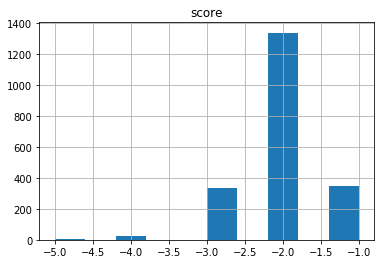

In [71]:
import matplotlib.pyplot as plt
afinn.hist()
plt.show()

In [86]:
afinn.loc[0,'word']

'abandon'

In [87]:
for dis in diseases:
    for i in afinn.index:
        afinn.loc[i,dis] = model.wv.similarity(afinn.loc[i,'word'], dis)
afinn.sample(10)

,word,score,sexual_dysfunction,infestation,rheumatic_heart_disease,nail_disease,hypotension,neonatal_disease,eating_disorder,seborrheic_dermatitis,...,gastrointestinal_ulcer,acute_bronchitis,peripheral_vascular_disease,varicella_infection,alopecia,kidney_cancer,osteomyelitis,septicemia,bladder_cancer,parasitic_infection
2655,sarcastic,-2,0.145491,-0.144372,-0.159537,0.038807,0.012801,-0.121388,0.120790,0.068431,...,-0.050216,-0.026497,-0.083402,0.004981,0.081807,-0.105952,-0.177107,-0.160188,-0.162168,-0.089610
2870,stifled,-1,-0.035848,-0.058276,-0.029239,0.036975,-0.095075,-0.073122,-0.066366,-0.062024,...,-0.155269,-0.152262,-0.024244,-0.231709,-0.083878,-0.090744,-0.108794,-0.169412,-0.190314,-0.126785
2002,ludicrous,-3,-0.047406,-0.034595,0.055141,-0.000590,-0.082525,-0.067794,0.023426,0.033669,...,-0.067368,-0.007731,0.056161,-0.027984,-0.060331,-0.011340,-0.045304,-0.105388,-0.112961,-0.054719
777,delay,-1,0.229542,0.188677,0.065939,-0.102396,0.324109,0.161686,0.090579,0.027706,...,0.095593,0.048612,0.076384,0.213979,0.155733,0.093064,0.158146,0.227380,0.070964,0.056537
1227,failing,-2,0.273054,0.173096,0.242969,-0.001256,0.309144,0.072822,0.286501,0.042549,...,-0.008590,0.020637,0.246302,0.138000,0.082410,0.169517,0.103305,0.211693,0.120754,0.089234
1215,extremists,-2,0.085702,-0.056868,0.046989,-0.132708,-0.044730,-0.053351,-0.108377,0.069457,...,-0.047774,-0.056945,0.032282,-0.075949,-0.065069,0.143039,-0.112453,-0.088547,0.020698,-0.008308
2198,obnoxious,-3,0.063646,0.272632,-0.039227,-0.097920,0.063369,-0.013512,0.037082,0.308879,...,0.020739,0.133360,-0.113372,0.104340,0.150570,0.118234,-0.046552,0.078905,0.102721,0.189055
983,distasteful,-2,0.182162,0.232707,0.029903,-0.009830,0.088904,0.038038,0.165320,0.196991,...,0.055978,0.085471,-0.031944,0.096626,0.091034,0.069759,-0.005984,0.056203,-0.001137,0.214948
1500,gullibility,-2,0.220979,0.064540,-0.022316,0.088966,0.022151,0.000886,0.196417,0.155981,...,0.025912,0.036095,0.021114,0.000198,-0.022116,0.011049,-0.108225,-0.073583,0.027246,0.048107
1697,inaction,-2,0.390742,0.112349,0.014553,-0.056101,0.159441,0.065480,0.209785,0.067206,...,0.016546,0.026632,0.120917,-0.012518,0.096427,0.158549,-0.045683,-0.036782,0.070994,0.073421


In [88]:
afinn.to_csv('hurts_afinn.csv')

In [89]:
afinn[afinn['word']=='pain']

,word,score,sexual_dysfunction,infestation,rheumatic_heart_disease,nail_disease,hypotension,neonatal_disease,eating_disorder,seborrheic_dermatitis,...,gastrointestinal_ulcer,acute_bronchitis,peripheral_vascular_disease,varicella_infection,alopecia,kidney_cancer,osteomyelitis,septicemia,bladder_cancer,parasitic_infection
2277,pain,-2,0.454644,0.202543,0.167966,0.174379,0.490491,0.132335,0.351077,0.343812,...,0.318691,0.290608,0.291401,0.216956,0.374334,0.083485,0.299751,0.18834,0.16127,0.200472


In [90]:
afinn[afinn['word']=='death']

,word,score,sexual_dysfunction,infestation,rheumatic_heart_disease,nail_disease,hypotension,neonatal_disease,eating_disorder,seborrheic_dermatitis,...,gastrointestinal_ulcer,acute_bronchitis,peripheral_vascular_disease,varicella_infection,alopecia,kidney_cancer,osteomyelitis,septicemia,bladder_cancer,parasitic_infection
729,death,-2,0.303788,0.434913,0.359195,-0.054364,0.41925,0.273341,0.181028,0.197293,...,0.164113,0.264633,0.320406,0.343533,0.248905,0.439949,0.289955,0.447807,0.407792,0.365587


In [93]:
hurts_summary = {}
L = len(afinn)
for dis in hurts:
    hurts_summary[dis] = -1*sum(afinn[dis]*afinn['score'])/L
hurts_summary

{'acne': 0.1128423780464093,
 'acquired_hypothyroidism': -0.009661256599392057,
 'acute_bronchitis': 0.15232620361445254,
 'acute_renal_failure': 0.07634489003915532,
 'acute_sinusitis': 0.1467642558585179,
 'acute_upper_respiratory_infection': 0.1426624619562416,
 'adjustment_disorder': 0.11352987186401717,
 'allergic_rhinitis': 0.05574259221537058,
 'alopecia': 0.10720836053286979,
 'alveolar_disease': -0.12230384593921831,
 'aneurysm': 0.08212987353716501,
 'aplastic_anemia': 0.12460659883927239,
 'asthma': 0.08414630383198567,
 'atherosclerosis': 0.009687572863157495,
 'autism': 0.08855118581369444,
 'biliary_tract_disease': 0.0774166568911447,
 'bipolar_disorder': 0.022647472176758755,
 'bladder_cancer': 0.05785842925258998,
 'bladder_disorder': 0.1426853820040326,
 'bone_cancer': 0.13873255737160944,
 'brain_cancer': 0.14333347267805227,
 'brain_damage': 0.19168185227560974,
 'breast_cancer': 0.04705435550700153,
 'cardiac_dysrhythmia': 0.15917612308979331,
 'cardiomyopathy': -0.

In [96]:
pd.Series(data=hurts_summary).to_csv('hurts_summary.csv')